In [2]:

import os

In [3]:
os.makedirs?

Signature: os.makedirs(name, mode=511, exist_ok=False)
Docstring:
makedirs(name [, mode=0o777][, exist_ok=False])

Super-mkdir; create a leaf directory and all intermediate ones.  Works like
mkdir, except that any intermediate path segment (not just the rightmost)
will be created if it does not exist. If the target directory already
exists, raise an OSError if exist_ok is False. Otherwise no exception is
raised.  This is recursive.
File:      /opt/homebrew/Cellar/python@3.9/3.9.13_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/os.py
Type:      function


In [5]:
for i in range(100):
    os.makedirs(f"question{i+1}")
    os.chdir(f"question{i+1}")
    f=open("solve.py",mode="w")
    f.close()
    os.chdir("..")

In [9]:
os.listdir()

['.ipynb_checkpoints', 'test.ipynb']

In [7]:
os.getcwd()

'/Users/shinyyama/.Trash/question1'

In [8]:
os.chdir("/Users/shinyyama/Documents/python/kyoupro/unsolved/100問")

In [3]:

import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd
import time
import datetime

class Scrape():

    def __init__(self,wait=1,max=None):
        self.response = None
        self.df = pd.DataFrame()
        self.wait = wait
        self.max = max
        self.headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"}
        self.timeout = 5

    def request(self,url,wait=None,max=None,console=True):
        '''
        指定したURLからページを取得する。
        取得後にwaitで指定された秒数だけ待機する。
        max が指定された場合、waitが最小値、maxが最大値の間でランダムに待機する。

        Params
        ---------------------
        url:str
            URL
        wait:int
            ウェイト秒
        max:int
            ウェイト秒の最大値
        console:bool
            状況をコンソール出力するか
        Returns
        ---------------------
        soup:BeautifulSoupの戻り値
        '''
        self.wait = self.wait if wait is None else wait
        self.max = self.max if max is None else max

        start = time.time()     
        response = requests.get(url,headers=self.headers,timeout = self.timeout)
        time.sleep(random.randint(self.wait,self.wait if self.max is None else self.max))
        
        if console:
            tm = datetime.datetime.now().strftime('%Y/%m/%d %H:%M:%S')
            lap = time.time() - start
            print(f'{tm} : {url}  経過時間 : {lap:.3f} 秒')

        return BeautifulSoup(response.content, "html.parser")
      
    def get_href(self,soup,contains = None):
        '''
        soupの中からアンカータグを検索し、空でないurlをリストで返す
        containsが指定された場合、更にその文字列が含まれるurlだけを返す

        Params
        ---------------------
        soup:str
            BeautifulSoupの戻り値
        contains:str
            抽出条件となる文字列            

        Returns
        ---------------------
        return :[str]
            条件を満たすurlのリスト
        '''
        urls = list(set([url.get('href') for url in soup.find_all('a')]))
        if contains is not None:
           return [url for url in urls if self.contains(url,contains)]
        return [url for url in urls if urls is not None or urls.strip() != '']

    def get_src(self,soup,contains = None):
        '''
        soupの中からimgタグを検索し、空でないsrcをリストで返す
        containsが指定された場合、更にその文字列が含まれるurlだけを返す

        Params
        ---------------------
        soup:str
            BeautifulSoupの戻り値
        contains:str
            抽出条件となる文字列            

        Returns
        ---------------------
        return :[str]
            条件を満たすurlのリスト
        '''
        urls = list(set([url.get('src') for url in soup.find_all('img')]))
        if contains is not None:
           return [url for url in urls if contains(url,self.contains)]
        return [url for url in urls if urls is not None or urls.strip() != '']

    def contains(self,line,kwd):
        '''
        line に kwd が含まれているかチェックする。
        line が None か '' の場合、或いは kwd が None 又は '' の場合は Trueを返す。

        Params
        ---------------------      
        line:str
            HTMLの文字列
        contains:str
            抽出条件となる文字列            

        Returns
        ---------------------
        return :[str]
            条件を満たすurlのリスト
        '''
        if line is None or line.strip() == '':
            return False
        if kwd is None or kwd == '':
            return True
        return kwd in line 
    
       
    def omit_char(self,values,omits):
        '''
        リストで指定した文字、又は文字列を削除する

        Params
        ---------------------      
        values:str
            対象文字列
        omits:str
            削除したい文字、又は文字列            

        Returns
        ---------------------
        return :str
            不要な文字を削除した文字列
        '''
        for n in range(len(values)):
            for omit in omits:
                values[n] = values[n].replace(omit,'')
        return values

    def add_df(self,values,columns,omits = None):
        '''
        指定した値を　DataFrame に行として追加する
        omits に削除したい文字列をリストで指定可能

        Params
        ---------------------      
        values:[str]
            列名
        omits:[str]
            削除したい文字、又は文字列            
        '''
        if omits is not None:
            values = self.omit_char(values,omits)
            columns = self.omit_char(columns,omits)
        
        df = pd.DataFrame(values,index=self.rename_column(columns))
        self.df = pd.concat([self.df,df.T])
   
    def to_csv(self,filename,dropcolumns=None):
        '''
        DataFrame をCSVとして出力する
        dropcolumns に削除したい列をリストで指定可能

        Params
        ---------------------      
        filename:str
            ファイル名
        dropcolumns:[str]
            削除したい列名            
        '''
        if dropcolumns is not None:
            self.df.drop(dropcolumns,axis=1,inplace=True) 
        self.df.to_csv(filename,index=False,encoding="shift-jis",errors="ignore")
    
    def get_text(self,soup):
        '''
        渡された soup が Noneでなければ textプロパティの値を返す

        Params
        ---------------------      
        soup: bs4.element.Tag
            bs4でfindした結果の戻り値
          
        Returns
        ---------------------
        return :str
            textプロパティに格納されている文字列
        '''

        return ' ' if soup == None else soup.text
    
    def rename_column(self,columns):
        '''
        重複するカラム名の末尾に連番を付与し、ユニークなカラム名にする
            例 ['A','B','B',B'] → ['A','B','B_1','B_2']

        Params
        ---------------------      
        columns: [str]
            カラム名のリスト
          
        Returns
        ---------------------
        return :str
            重複するカラム名の末尾に連番が付与されたリスト
        '''
        lst = list(set(columns))
        for column in columns:
            dupl = columns.count(column)
            if dupl > 1:
                cnt = 0
                for n in range(0,len(columns)):
                    if columns[n] == column:
                        if cnt > 0:
                            columns[n] = f'{column}_{cnt}'
                        cnt += 1
        return columns

    def write_log(self,filename,message):
        '''
        指定されたファイル名にmessageを追記する。

        Params
        ---------------------      
        filename: str
            ファイル名
        message: str
            ファイルに追記する文字列          
        '''
        message += '\n'
        with open(filename, 'a', encoding='shift-jis') as f:
           f.write(message)
           print(message)

    def read_log(self,filename):
        '''
        指定されたファイル名を読み込んでリストで返す

        Params
        ---------------------      
        filename: str
            ファイル名
           
        Returns
        ---------------------
        return :[str]
            読み込んだ結果
        '''
        with open(filename, 'r', encoding='shift-jis') as f:
           lines = f.read()
        return lines

ModuleNotFoundError: No module named 'bs4'

In [ ]:
with open("links.txt","r") as f:
    f.write("")

In [4]:
print([1]*(1<<4))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [6]:
S=2
x=3
S ^ 1 << x

10

In [8]:
2 ^ 2

0

In [11]:
list(range(1,7))

[1, 2, 3, 4, 5, 6]

In [13]:
from bisect import bisect_left
list1=[1,2,3,4,5]
y=bisect_left(list1,3)
print(y)

2


In [1]:
1==True

True

In [2]:
for i in range(10):
    print(i,1<i<5)

0 False
1 False
2 True
3 True
4 True
5 False
6 False
7 False
8 False
9 False


In [3]:
for i,j in zip(range(4),range(5)):
    print(i,j)

0 0
1 1
2 2
3 3


In [4]:
"abcde".count("a")

1

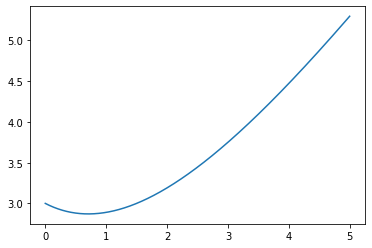

In [15]:
p=3
import math
calc_time=lambda t:t+p*math.pow(2,-2*t/3)
import  matplotlib.pyplot as plt
import numpy as np
t=np.linspace(0,5,1000)
y=[calc_time(dt) for dt in t]
plt.plot(t,y)

In [16]:
import math
math.log10(1000000000000000000)

18.0

In [17]:
plt.plot(x,p*math.pow(2,-2*t/3))

TypeError: only size-1 arrays can be converted to Python scalars

In [19]:
t=90
print(10**18*math.pow(2,-2*t/3))

0.8673617379884035


In [20]:
import matplotlib.pyplot as plt
import numpy as np
left=0
right=100
x = np.linspace(0, right, 100 * right)
y = x + (right**2) * np.power(2, -2 * x / 3)
plt.show(x, y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [21]:
np.linspace?

Signature:
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Docstring:
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end value of the sequence, unless `endpoint` is set to False.
    In that case, the sequence consists of all but the last of ``num + 1``
    evenly spaced samples, so that `stop` is excluded.  Note that the step
    size changes when `endpoint` is Fals

In [1]:
for i in range(3//2):
    k=2*i+1
    print(k)

1


In [2]:
n=103
for i in range(n // 2 + 1):
    k = 2 * i + 1
    print(k)

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
53
55
57
59
61
63
65
67
69
71
73
75
77
79
81
83
85
87
89
91
93
95
97
99
101
103


In [4]:
c = 0
k=105
for j in [k % i == 0 for i in range(1, k + 1)]:
    c += 1
    if j:
        print(c)

1
3
5
7
15
21
35
105


In [8]:
[1].re

Object `[1]` not found.


In [9]:
import numpy as np
N=5
dp = np.zeros(N, np.int64)
print(dp)
for n in range(1, N + 1):
    dp = np.append(dp, dp[0])  # dpも円環
    print(dp)

[0 0 0 0 0]
[0 0 0 0 0 0]
[0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [12]:
from scipy.special import comb
base = comb(64, 8, exact=True)
print(base) # 10

ModuleNotFoundError: No module named 'scipy'

In [1]:
2//3

0

In [2]:
a=["a","b","c"]
a.remove("a")
print(a)

['b', 'c']


In [5]:
x=0
def add1():
    global x
    x=x+1
for i in range(3):
    add1()
    print(x)

1
2
3


In [6]:
len(set([1,1,2,3]))

3

In [34]:
position=[
    [1,0,3,4],
    [5,6,0,8],
    [0,10,11,12]
]
h=3
w=4

In [32]:
def rotate(t):  # positionをtが一なら右に傾け、違えばもとに戻す
    global position
    if t:#右に傾ける
        result = [[0] * h for i in range(w)]
        for i in range(h):
            for j in range(w):
                print(i, j, w, h)
                result[j][h - 1 - i] = position[i][j]
        position = result
    else:#もとに戻す
        result = [[0] * w for i in range(h)]
        for i in range(w):
            for j in range(h):
                result[h - 1 - j][i] = position[i][j]

        position = result


def move_to_left(some_list):
    result = [0 for i in range(len(some_list))]
    index_counter = 0
    for num in some_list:
        if num:
            result[index_counter]=num
            index_counter += 1
    return result


def fall():
    # 各列についてどんどん落下させていく
    # そのために右に傾けてから左に詰めていく
    global position
    rotate(1)
    for i in range(w):  # i行目を左詰めしていく
        position[i] = move_to_left(position[i])
    rotate(0)  # 左に傾けて元通り


def banish():  # kつ以上並んだ箇所を特定して削除,出力には結果と点数
    global position
    result = position.copy()
    score = 0
    if k <= w:  # 横で消す
        for i in range(h):  # i行目を考える
            row = position[i]
            for length in reversed(range(k, w + 1)):  # 長さがw-kまでで該当する箇所を削除していく
                for start in range(w - length + 1):
                    tmp = list(set(row[start : start + length]))
                    if len(tmp) == 1 and (0 not in tmp):
                        score += length * tmp[0]
                        for j in range(length):
                            result[i][start + j] = 0
    return (result, score)


In [11]:
def show():
    for line in position:
        print(line)

In [35]:
show()
fall()
show()

[1, 0, 3, 4]
[5, 6, 0, 8]
[0, 10, 11, 12]
0 0 4 3
0 1 4 3
0 2 4 3
0 3 4 3
1 0 4 3
1 1 4 3
1 2 4 3
1 3 4 3
2 0 4 3
2 1 4 3
2 2 4 3
2 3 4 3
[0, 0, 0, 4]
[1, 6, 3, 8]
[5, 10, 11, 12]


In [33]:
move_to_left([0,1,2,3])

[1, 2, 3, 0]

In [36]:
k=2
position=[
    [1,2,3,0],
    [1,1,3,4],
    [2,3,4,4]
]
show()
position,score=banish()
show()
print(score)

[1, 2, 3, 0]
[1, 1, 3, 4]
[2, 3, 4, 4]
[1, 2, 3, 0]
[0, 0, 3, 4]
[2, 3, 0, 0]
10


In [37]:
def rotate(t):  # positionをtが一なら右に傾け、違えばもとに戻す
    global position
    if t:  # 右に傾ける
        result = [[0] * h for i in range(w)]
        show()
        for i in range(h):
            for j in range(w):
                print(w, h, j, h - i - 1, i, j)
                result[j][h - 1 - i] = position[i][j]
        position = result
h=4
w=4
position=[
    [3,4,1,3],
    [4,1,2,1],
    [1,4,2,4],
    [2,3,1,2]
]

In [53]:
h, w, k = 4,4,2
save_data=list([
    [3,4,1,3],
    [4,1,2,1],
    [1,4,2,4],
    [2,3,1,2]
]*h*w)
position =[
    [3,4,1,3],
    [4,1,2,1],
    [1,4,2,4],
    [2,3,1,2]
]


def show(position):
    for line in position:
        print(line)
    print()


def rotate(t,position):  # positionをtが一なら右に傾け、違えばもとに戻す
    # global position
    if t:  # 右に傾ける
        result = [[0] * h for i in range(w)]
        # show()
        for i in range(h):
            for j in range(w):
                # print(w, h, j, h - i - 1, i, j)
                result[j][h - 1 - i] = position[i][j]
        position = result
    else:  # もとに戻す
        result = [[0] * w for i in range(h)]
        for i in range(w):
            for j in range(h):
                result[h - 1 - j][i] = position[i][j]

        position = result


def move_to_left(some_list):
    result = [0 for i in range(len(some_list))]
    index_counter = 0
    for num in some_list:
        if num:
            result[index_counter] = num
            index_counter += 1
    return result


def fall(position):
    # 各列についてどんどん落下させていく
    # そのために右に傾けてから左に詰めていく
    # global position
    rotate(1,position)
    for i in range(w):  # i行目を左詰めしていく
        position[i] = move_to_left(position[i])
    rotate(0,position)  # 左に傾けて元通り


def banish(position):  # kつ以上並んだ箇所を特定して削除,出力には結果と点数
    # global position
    result = position.copy()
    score = 0
    if k <= w:  # 横で消す
        for i in range(h):  # i行目を考える
            row = position[i]
            for length in reversed(range(k, w + 1)):  # 長さがw-kまでで該当する箇所を削除していく
                for start in range(w - length + 1):
                    tmp = list(set(row[start : start + length]))
                    if len(tmp) == 1 and (0 not in tmp):
                        score += length * tmp[0]
                        for j in range(length):
                            result[i][start + j] = 0
    return (result, score)

max_score = 0
c=0
for i in range(h):
    for j in range(w):
        tot_score = 0
        position = save_data[c]  # 初期化
        c+=1
        print(save_data)
        position[i][j] = 0  # 最初のドミノを倒す
        counter = 1
        # show()
        fall(position)
        # show()
        position, score = banish(position)
        # show()
        tot_score += score
        counter *= 2
        while score:  # 前の段階で消えた
            fall(position)
            # show()
            position, score = banish(position)
            # show()
            tot_score += score*counter
            print(tot_score)
            counter *= 2
        print(tot_score)
        max_score=max(tot_score,max_score)
        


[[3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2], [3, 4, 1, 3], [4, 1, 2, 1], [1, 4, 2, 4], [2, 3, 1, 2]]


TypeError: 'int' object does not support item assignment

In [49]:
a=[1,2,3]
b=a.copy()
a=b.copy()
a[0]=0
print(b)

[1, 2, 3]


In [54]:
if -1:
    print(-1)

-1


In [2]:
# -*- coding: utf-8 -*-
# https://atcoder.jp/contests/joi2013ho/tasks/joi2013ho1
import sys

n=5
lights = [1,1,0,1,1]
for i in range(0, n, 2):
    lights[i] = (lights[i] + 1) % 2
# あとはlightsを1か０に統一すればよろしい
line = []  # 連続した長さを放り込んでいく
prev_num = -1
for num in lights:
    if num != prev_num:
        line.append(1)
        prev_num = num
    else:
        line[-1] += 1
        prev_num = num
# 連続した部分を任意に一つ連結する
max_num = 0
print(lights,line)
if len(line) < 3:
    print(len(lights))
    exit()
for i in range(len(line) - 2):
    score = line[i] + line[i + 1] + line[i + 2]
    max_num = max(max_num, score)
print(max_num)


[0, 1, 1, 1, 0] [1, 3, 1]
5


In [4]:
print(list(range(1,1)))

[]


In [6]:
get_name_by_id = [[[""] * 2] * 2 for j in range(2)]
for j in range(2):
    for o in range(2):
        for i in range(2):
            if j:
                get_name_by_id[j][o][i] += "J"
            if o:
                get_name_by_id[j][o][i] += "O"
            if i:
                get_name_by_id[j][o][i] += "I"
print("j",get_name_by_id[1])

j [['JJO', 'JIJOI'], ['JJO', 'JIJOI']]


In [8]:
# -*- coding: utf-8 -*-
# https://atcoder.jp/contests/joi2014yo/tasks/joi2014yo_d
import sys

input = sys.stdin.readline
# どうせまたdpでしょ、、、
# 今回はi日目での出席の取り方が、i-1日目の出席者に左右される
n = 2
presidents = ["O","I"]
dp = []  # i成分はi日目までのスケジュールの全通りを表していている,ただしJ,O,Iが出席したかどうかで場合分けしてj,k,l成分に格納する
# 初日は手入力
president0 = presidents[0]
result = [[[0] * 2 for o in range(2)] for j in range(2)]
get_name_by_id = [[[""] * 2 for o in range(2)] for j in range(2)]
for j in range(2):
    for o in range(2):
        for i in range(2):
            if j:
                get_name_by_id[j][o][i] += "J"
            if o:
                get_name_by_id[j][o][i] += "O"
            if i:
                get_name_by_id[j][o][i] += "I"
print(get_name_by_id)
if president0 == "J":  # J君が責任者で、ioの出席は任意
    for o in range(2):
        for i in range(2):
            result[1][o][i] = 1
elif president0 == "O":
    for j in range(2):
        for i in range(2):
            result[j][1][i] = 1
else:
    for j in range(2):
        for o in range(2):
            result[j][o][1] = 1
dp.append(result)

for l in range(n - 1):  # i日目の情報をもとにi+1日目を考える
    president = presidents[l + 1]  # 以下presidentを含む要素を全て足していく
    prev_day = dp[-1]
    tmp = [[[0] * 2] * 2 for i in range(2)]
    for j in range(2):
        for o in range(2):
            for i in range(2):
                name = get_name_by_id[j][o][i]  # 当日の出席
                if president in name:  # presidentが出席時のみ、dp[i+1][j][o][i]を計算していく
                    for prev_j in range(2):
                        for prev_o in range(2):
                            for prev_i in range(2):
                                if (
                                    (j * prev_j) + (o * prev_o) + (i * prev_i)
                                ):  # 鍵の受け渡しが可能だった
                                    tmp[j][o][i] += prev_day[prev_j][prev_o][prev_i]
                                    print(
                                        get_name_by_id[prev_j][prev_o][prev_i],
                                        get_name_by_id[j][o][i],
                                    )
    dp.append(tmp)
totnum = 0
for j in range(2):
    for o in range(2):
        for i in range(2):
            totnum += dp[-1][j][o][i]
print(totnum)
print(dp)


[[['', 'I'], ['O', 'OI']], [['J', 'JI'], ['JO', 'JOI']]]
I I
OI I
JI I
JOI I
I OI
O OI
OI OI
JI OI
JO OI
JOI OI
I JI
OI JI
J JI
JI JI
JO JI
JOI JI
I JOI
O JOI
OI JOI
J JOI
JI JOI
JO JOI
JOI JOI
26
[[[[0, 0], [1, 1]], [[0, 0], [1, 1]]], [[[0, 6], [0, 6]], [[0, 7], [0, 7]]]]


In [11]:
for j in range(2):
    for o in range(2):
        for i in range(2):
            print(get_name_by_id[j][o][i],dp[0][j][o][i])
for j in range(2):
    for o in range(2):
        for i in range(2):
            print(get_name_by_id[j][o][i],dp[-1][j][o][i])

 0
I 0
O 1
OI 1
J 0
JI 0
JO 1
JOI 1
 0
I 6
O 0
OI 6
J 0
JI 7
JO 0
JOI 7


In [14]:
"I" in "JO"

False

In [17]:
str(float(0)).split(".")

['0', '0']